<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_2X/blob/main/GQtest_data_multi_delta_(_1_2)_n20_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_2X/multiplication_delta_-1.2'

In [4]:
os.listdir(base_path)

['data_multi_delta_-1.2_n20.csv',
 'data_multi_delta_-1.2_n30.csv',
 'data_multi_delta_-1.2_n60.csv',
 'data_multi_delta_-1.2_n120.csv',
 'data_multi_delta_-1.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-1.2_n20.csv')

pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.215333,24.104131,0.256995,72.576459,72.375354,0.201104
1,0.0,1.0,26.767247,70.076414,0.009897,106.853558,106.852296,0.001263
2,0.0,2.0,92.619502,37.422225,0.103057,140.144784,140.038198,0.106586
3,0.0,3.0,90.383373,86.364006,0.017852,186.765231,186.685657,0.079574
4,0.0,4.0,98.504101,75.865400,-0.120107,184.249394,184.314208,-0.064814
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.219298,63.591793,0.098784,168.909874,168.829399,0.080476
19996,999.0,16.0,56.854349,74.528548,0.035115,141.418012,141.381277,0.036734
19997,999.0,17.0,50.425421,51.808109,0.257794,112.491323,112.242428,0.248895
19998,999.0,18.0,84.612591,62.567787,-0.114920,157.065458,157.195461,-0.130003


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.215333,24.104131,0.256995,72.576459,72.375354,0.201104
1,0.0,1.0,26.767247,70.076414,0.009897,106.853558,106.852296,0.001263
2,0.0,2.0,92.619502,37.422225,0.103057,140.144784,140.038198,0.106586
3,0.0,3.0,90.383373,86.364006,0.017852,186.765231,186.685657,0.079574
4,0.0,4.0,98.504101,75.865400,-0.120107,184.249394,184.314208,-0.064814
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.219298,63.591793,0.098784,168.909874,168.829399,0.080476
19996,999.0,16.0,56.854349,74.528548,0.035115,141.418012,141.381277,0.036734
19997,999.0,17.0,50.425421,51.808109,0.257794,112.491323,112.242428,0.248895
19998,999.0,18.0,84.612591,62.567787,-0.114920,157.065458,157.195461,-0.130003


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,38.215333,24.104131,0.256995,72.576459,72.375354,0.201104
1,0.0,1.0,26.767247,70.076414,0.009897,106.853558,106.852296,0.001263
2,0.0,2.0,92.619502,37.422225,0.103057,140.144784,140.038198,0.106586
3,0.0,3.0,90.383373,86.364006,0.017852,186.765231,186.685657,0.079574
4,0.0,4.0,98.504101,75.865400,-0.120107,184.249394,184.314208,-0.064814
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,95.219298,63.591793,0.098784,168.909874,168.829399,0.080476
19996,999.0,16.0,56.854349,74.528548,0.035115,141.418012,141.381277,0.036734
19997,999.0,17.0,50.425421,51.808109,0.257794,112.491323,112.242428,0.248895
19998,999.0,18.0,84.612591,62.567787,-0.114920,157.065458,157.195461,-0.130003


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    38.215333  24.104131  0.256995   72.576459   72.375354  0.201104
      1.0    26.767247  70.076414  0.009897  106.853558  106.852296  0.001263
      2.0    92.619502  37.422225  0.103057  140.144784  140.038198  0.106586
      3.0    90.383373  86.364006  0.017852  186.765231  186.685657  0.079574
      4.0    98.504101  75.865400 -0.120107  184.249394  184.314208 -0.064814
...                ...        ...       ...         ...         ...       ...
999.0 15.0   95.219298  63.591793  0.098784  168.909874  168.829399  0.080476
      16.0   56.854349  74.528548  0.035115  141.418012  141.381277  0.036734
      17.0   50.425421  51.808109  0.257794  112.491323  112.242428  0.248895
      18.0   84.612591  62.567787 -0.114920  157.065458  157.195461 -0.130003
      19.0   51.265097  32.498698 -0.045270   93.718526   93.783893 -0.065367

[20000 rows x 6 columns]

<AxesSubplot:xlabel='x2', ylabel='e'>

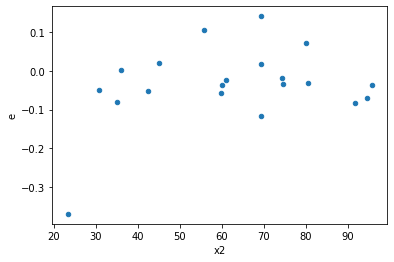

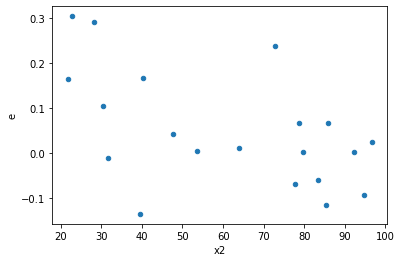

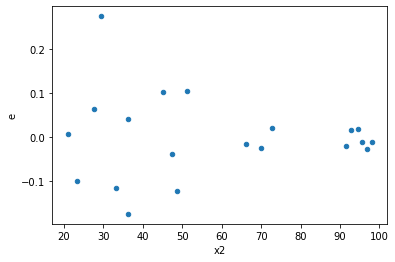

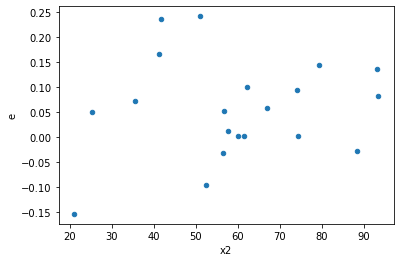

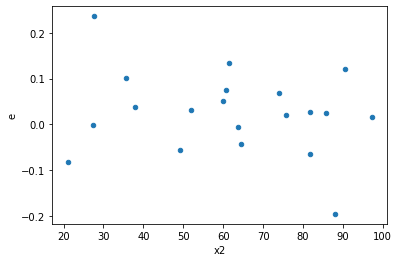

In [12]:
tablenew0 = table.loc[11.0]
tablenew1 = table.loc[16.0]
tablenew2 = table.loc[23.0]
tablenew3 = table.loc[28.0]
tablenew4 = table.loc[31.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x2
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
5.0,6.0,6.0,0.03341193548750294,0.055039845760721746,0.005568655914583823,0.009173307626786958,1.6473109072447567,0.5594780100549963,0.7202609949725018,0.27973900502749816,Reject001=1 : Homoscedasticity
22.0,6.0,6.0,0.029980872966649526,0.03502165113937749,0.004996812161108254,0.005836941856562915,1.1681331353605109,0.8551804561993408,0.5724097719003296,0.4275902280996704,Reject001=1 : Homoscedasticity
30.0,6.0,6.0,0.005406287176927253,0.03495661765722643,0.0009010478628212089,0.005826102942871072,6.465919495807206,0.03892112424396377,0.9805394378780181,0.019460562121981884,Reject001=1 : Homoscedasticity
36.0,6.0,6.0,0.0470963687187876,0.05039155079543289,0.0078493947864646,0.008398591799238816,1.0699667971499212,0.9366715168968511,0.5316642415515744,0.46833575844842557,Reject001=1 : Homoscedasticity
43.0,6.0,6.0,0.010807973331649724,0.029598304884349176,0.0018013288886082873,0.004933050814058196,2.7385619834640456,0.24561292927105471,0.8771935353644726,0.12280646463552736,Reject001=1 : Homoscedasticity
46.0,6.0,6.0,0.06143662612083806,0.06872202268809569,0.010239437686806343,0.011453670448015948,1.1185839299333948,0.8952692419984738,0.5523653790007631,0.4476346209992369,Reject001=1 : Homoscedasticity
52.0,6.0,6.0,0.05326019648025132,0.0712629085057135,0.00887669941337522,0.011877151417618916,1.3380143749964857,0.732678675577644,0.633660662211178,0.366339337788822,Reject001=1 : Homoscedasticity
53.0,6.0,6.0,0.018595497062453347,0.02507683012207839,0.003099249510408891,0.004179471687013065,1.3485431466476727,0.7257934243978608,0.6371032878010696,0.3628967121989304,Reject001=1 : Homoscedasticity
59.0,6.0,6.0,0.0029565217647198384,0.03379785462904271,0.0004927536274533064,0.005632975771507118,11.43162720205627,0.00919424600896046,0.9954028769955198,0.00459712300448023,Reject001=0 : Heteroscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,6.0,6.0,0.1796617243732221,0.02428841876731705,0.029943620728870347,0.0040480697945528415,0.1351897230868232,0.02803290396947914,Reject001=1 : Homoscedasticity
1.0,6.0,6.0,0.13912924212586245,0.014531720168486495,0.023188207020977073,0.002421953361414416,0.10444763405913231,0.014606909385550806,Reject001=1 : Homoscedasticity
2.0,6.0,6.0,0.09264281502911409,0.02152857542342801,0.015440469171519014,0.003588095903904668,0.2323825697293676,0.09902562668596558,Reject001=1 : Homoscedasticity
3.0,6.0,6.0,0.08062265907152057,0.03208186803268224,0.013437109845253427,0.00534697800544704,0.39792619596213435,0.2867611435898772,Reject001=1 : Homoscedasticity
4.0,6.0,6.0,0.08159609298693837,0.003010064406601002,0.013599348831156396,0.0005016774011001669,0.036889810484955966,0.0008532608149855607,Reject001=0 : Heteroscedasticity
5.0,6.0,6.0,0.03341193548750294,0.055039845760721746,0.005568655914583823,0.009173307626786958,1.6473109072447567,0.5594780100549963,Reject001=1 : Homoscedasticity
6.0,6.0,6.0,0.12215049036366847,0.036288345763013506,0.020358415060611413,0.006048057627168917,0.2970790019342144,0.165304280923679,Reject001=1 : Homoscedasticity
7.0,6.0,6.0,0.043088375190929305,0.009824543804351446,0.0071813958651548845,0.0016374239673919077,0.2280091500507461,0.09501404914433381,Reject001=1 : Homoscedasticity
8.0,6.0,6.0,0.031067139329290058,0.013981034765221285,0.005177856554881676,0.002330172460870214,0.45002646098284255,0.35410047102656267,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=1 : Homoscedasticity      918
Reject001=0 : Heteroscedasticity     82
Name: Result_test, dtype: int64